In [1]:
##import packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#load dataset
df = pd.read_csv("C:/Users/Dell/Desktop/temperature.csv")
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [2]:
#shape of dataset
df.shape

(165085, 4)

In [ ]:
df_05to14.info()

In [7]:
#split date column into two
df['Year'] = df['Date'].apply(lambda x: x[:4])
df['Date2'] = df['Date'].apply(lambda x: x[-5:])
df = df[df['Date2'] != '02-29']
df_05to14 = df[~(df['Year'] == '2015')]
df_05to14.head()

,ID,Date,Element,Data_Value,Year,Date2
0,USW00094889,2014-11-12,TMAX,22,2014,11-12
1,USC00208972,2009-04-29,TMIN,56,2009,04-29
2,USC00200032,2008-05-26,TMAX,278,2008,05-26
3,USC00205563,2005-11-11,TMAX,139,2005,11-11
4,USC00200230,2014-02-27,TMAX,-106,2014,02-27


In [9]:
#max and min data values from 2005 to 2014
max_04to15 = df_05to14.groupby('Date2').agg({'Data_Value':np.max})
min_04to15 = df_05to14.groupby('Date2').agg({'Data_Value':np.min})

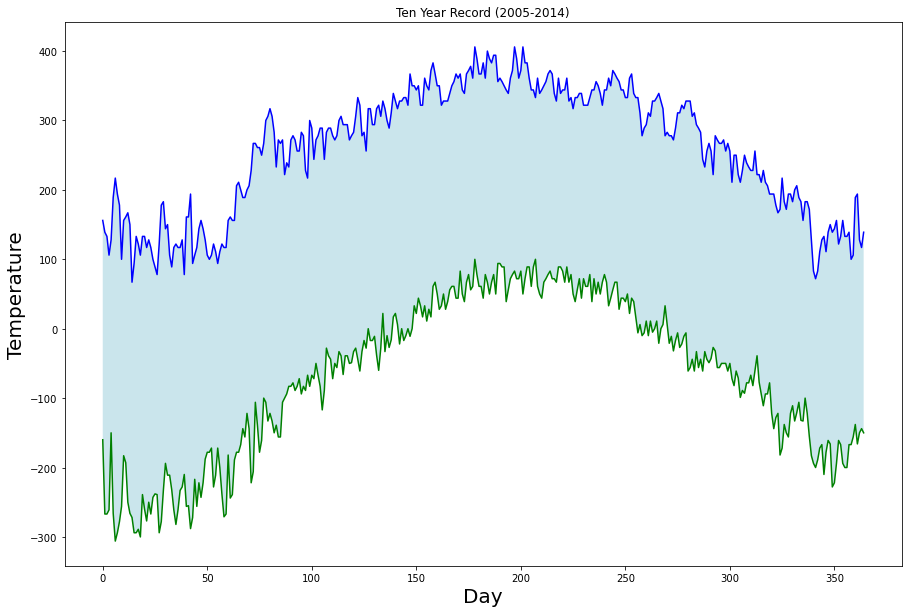

In [26]:
#plotting max and min data values from 2005 to 2014
plt.figure(figsize=(15,10))

plt.plot(max_04to15.values, c = 'blue', label ='Record High')
plt.plot(min_04to15.values, c = 'green', label ='Record Low')

plt.xlabel('Day', fontsize=20)
plt.ylabel('Temperature', fontsize=20)
plt.title('Ten Year Record (2005-2014)')

plt.gca().fill_between(range(len(max_04to15)), 
                       np.array(max_04to15.values.reshape(len(min_04to15.values),)), 
                       np.array(min_04to15.values.reshape(len(min_04to15.values),)), 
                       facecolor='#2F99B4', 
                       alpha=0.25)

plt.show()

In [12]:
df_15 = df[df['Year'] == '2015']
df_15.head()

,ID,Date,Element,Data_Value,Year,Date2
19,USC00205563,2015-01-03,TMIN,-39,2015,01-03
30,USC00203712,2015-03-17,TMAX,189,2015,03-17
34,USC00200032,2015-06-06,TMIN,128,2015,06-06
46,USW00014833,2015-08-30,TMIN,178,2015,08-30
50,USC00202308,2015-08-30,TMIN,156,2015,08-30


In [16]:
#max and min data values of 2015
max_15 = df_15.groupby('Date2').agg({'Data_Value':np.max})
min_15 = df_15.groupby('Date2').agg({'Data_Value':np.min})

#merging previous data values with data values of 2015
all_max = pd.merge(max_04to15.reset_index(), max_15.reset_index(), left_index=True, on = 'Date2')
all_min = pd.merge(min_04to15.reset_index(), min_15.reset_index(), left_index=True, on = 'Date2')
break_max = all_max[all_max['Data_Value_y'] > all_max['Data_Value_x']]
break_min = all_min[all_min['Data_Value_y'] < all_min['Data_Value_x']]


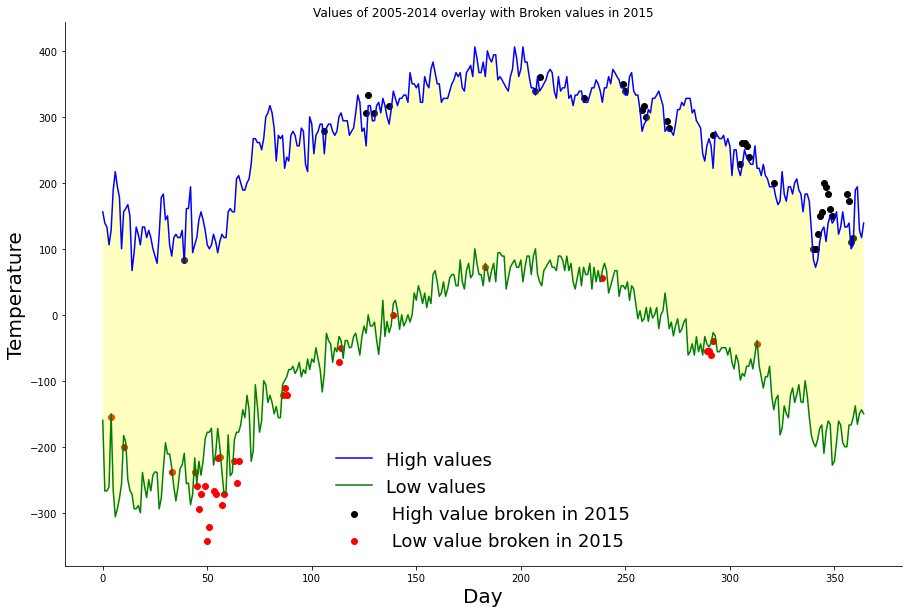

In [28]:
##SCATTER PLOT along with previous plot
plt.figure(figsize=(15,10))

plt.plot(max_04to15.values, color = 'blue', label ='High values')
plt.plot(min_04to15.values, color = 'green', label ='Low values')

plt.xlabel('Day', fontsize=20)
plt.ylabel('Temperature', fontsize=20)
plt.title('Values of 2005-2014 overlay with Broken values in 2015')

plt.scatter(break_max.index.tolist(), break_max['Data_Value_y'].values, c = 'black', label = " High value broken in 2015")
plt.scatter(break_min.index.tolist(), break_min['Data_Value_y'].values, c = 'red', label = " Low value broken in 2015")

plt.gca().fill_between(range(len(max_04to15)), 
                       np.array(max_04to15.values.reshape(len(min_04to15.values),)), 
                       np.array(min_04to15.values.reshape(len(min_04to15.values),)), 
                       facecolor='yellow', 
                       alpha=0.25)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc = 8, fontsize=18, frameon = False)
plt.show()


In [32]:
!pip install mplleaflet

  Created wheel for mplleaflet: filename=mplleaflet-0.0.5-py3-none-any.whl size=28555 sha256=5266a71edf45a93c5978ad1a7689514aa70fdbd8769250ab48905e2e306f5b2e
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\d4\a9\cf\8c4753b208759e9509ade040a94c3d4271f1756f529c575dc8
Successfully built mplleaflet


In [66]:
 df = pd.read_csv('C:/Users/Dell/Desktop/BinSize.csv')

In [67]:
df['hash']

0        1f6f0e89f4e937d934fe9acde2545e0d66bbcfe3b66320...
1        1f6f0e89f4e937d934fe9acde2545e0d66bbcfe3b66320...
2        35c9093084d26708afc5b482ea15ba52e3f20fb7cd781f...
3        2a6a7edad90579049fd1b3c3a990e8a8be90cb1975118e...
4        039e75bbef55baa3fecc0568dc3b245666a98b1bcba6b4...
                               ...                        
18254    c1f39870d7200ac9fa7748c4d6688cbbe48cd3ac4c4a9e...
18255    25cba19cddf24c1999b6b8812cbccbb2fc8f3e64715d73...
18256    6c7f11051d64bc4f778b4d2417b11ec72b4f655aed5fea...
18257    1d695305fb4a37e8903ca1b196f14d940b84cbc1c31d4b...
18258    49aa45ff962c662a14fcbb47c83454c8714c4943993a15...
Name: hash, Length: 18259, dtype: object

In [76]:
df = pd.read_csv('C:/Users/Dell/Desktop/BinSize.csv')
hashid = 'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89'
station_locations_by_hash = df[df['hash'] == hashid]

lons = station_locations_by_hash['LONGITUDE'].tolist()
lats = station_locations_by_hash['LATITUDE'].tolist()

plt.figure(figsize=(8,8))

plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

mplleaflet.display()

